In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RoomNights.csv to RoomNights (1).csv


In [ ]:
import pandas as pd

file_path = "RoomNights.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Region,Month/Year,Room nights sold (Rounded to nearest thousand)
0,South Shore,2007-01-01,6000.0
1,Halifax Metro,2007-01-01,73000.0
2,Eastern Shore,2007-01-01,0.0
3,Cape Breton,2007-01-01,12000.0
4,Northumberland Shore,2007-01-01,8000.0


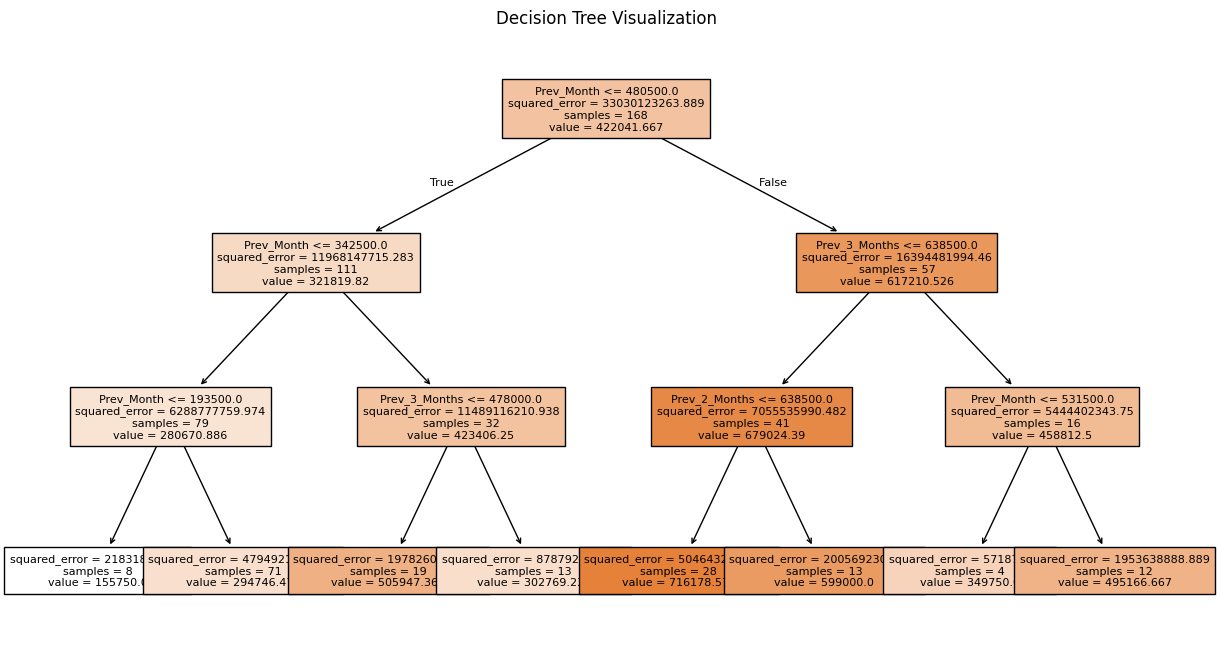

Decision Tree RMSE: 75023.66
Decision Tree MAE: 60898.58


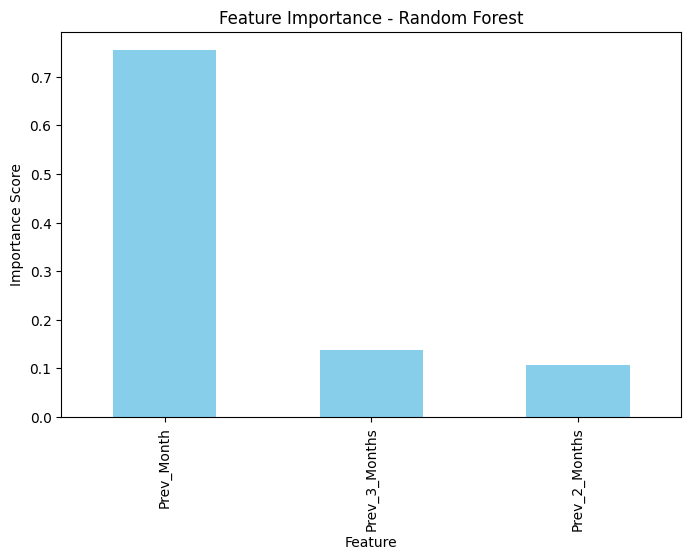

Random Forest RMSE: 62711.13
Random Forest MAE: 34007.14


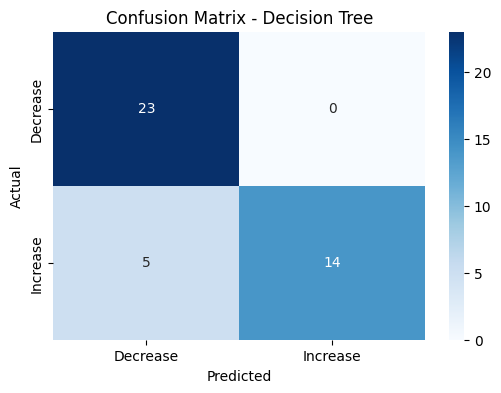

Classification Accuracy: 0.88


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score

file_path = "RoomNights.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df_ns = df.groupby("Month/Year", as_index=False)["Room nights sold (Rounded to nearest thousand)"].sum()

df_ns["Prev_Month"] = df_ns["Room nights sold (Rounded to nearest thousand)"].shift(1)
df_ns["Prev_2_Months"] = df_ns["Room nights sold (Rounded to nearest thousand)"].shift(2)
df_ns["Prev_3_Months"] = df_ns["Room nights sold (Rounded to nearest thousand)"].shift(3)

df_ns = df_ns.dropna()

y = df_ns["Room nights sold (Rounded to nearest thousand)"]
X = df_ns.drop(columns=["Room nights sold (Rounded to nearest thousand)", "Month/Year"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree MAE: {mae_dt:.2f}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feat_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")

y_test_class = (y_test.diff().fillna(0) > 0).astype(int)
y_pred_class = (pd.Series(y_pred_dt).diff().fillna(0) > 0).astype(int)

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Decrease", "Increase"], yticklabels=["Decrease", "Increase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy:.2f}")